In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
scipy.__version__


df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0096056,0.0,0.0,126.0,Crime and Punishment,5.500,NaN
1,tt0118926,0.0,5227348.0,132.0,The Dancer Upstairs,6.294,R
2,tt0119980,0.0,0.0,91.0,Random Shooting in LA,0.000,NaN
3,tt0120679,12000000.0,56298474.0,123.0,Frida,7.455,R
4,tt0120804,33000000.0,102984862.0,100.0,Resident Evil,6.602,R


In [218]:
df.dropna(subset=['certification'], inplace=True)
df.isna().sum()

imdb_id          0
budget           0
revenue          0
runtime          0
title            0
vote_average     0
certification    0
dtype: int64

In [219]:
df['certification'].value_counts()

R                                  3509
PG-13                              1863
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

## getting only the certifications I want

In [220]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts()

R                                  3510
PG-13                              1864
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
10                                    1
Name: certification, dtype: int64

In [221]:
r_df = df.loc[(df['certification'] == 'R')]
r_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
1,tt0118926,0.0,5227348.0,132.0,The Dancer Upstairs,6.294,R
3,tt0120679,12000000.0,56298474.0,123.0,Frida,7.455,R
4,tt0120804,33000000.0,102984862.0,100.0,Resident Evil,6.602,R
11,tt0149253,0.0,0.0,96.0,Texas '46,3.500,R
15,tt0160184,55000000.0,6632383.0,96.0,D-Tox,5.613,R
...,...,...,...,...,...,...,...
44307,tt4197006,0.0,0.0,70.0,The Sect,3.000,R
44329,tt4209020,0.0,0.0,72.0,Here kitty kitty!,5.000,R
44538,tt4416878,0.0,0.0,51.0,Lake Nowhere,6.000,R
44561,tt4473620,0.0,0.0,90.0,Witching Hour,10.000,R


In [222]:
g_df = df.loc[(df['certification'] == 'G')]
g_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
10,tt0146063,0.0,0.0,88.0,The Princess and the Pea,7.100,G
27,tt0166813,80000000.0,122563539.0,83.0,Spirit: Stallion of the Cimarron,7.691,G
115,tt0243585,120000000.0,169956806.0,78.0,Stuart Little 2,5.738,G
231,tt0265662,20000000.0,75597042.0,127.0,The Rookie,6.719,G
276,tt0271582,0.0,1347988.0,91.0,Joshua,6.500,G
...,...,...,...,...,...,...,...
44228,tt4150316,0.0,0.0,45.0,Frozen in Time,4.800,G
44241,tt4157940,0.0,8520000.0,87.0,The Magical Brush,4.800,G
44558,tt4468650,0.0,0.0,0.0,神秘世界历险记2,6.500,G
44615,tt4591840,10000000.0,0.0,82.0,A Christmas Star,5.000,G


In [223]:
pg_df = df.loc[(df['certification'] == 'PG')]
pg_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
6,tt0121765,120000000.0,649398328.0,142.0,Star Wars: Episode II - Attack of the Clones,6.542,PG
8,tt0133240,140000000.0,109578115.0,95.0,Treasure Planet,7.530,PG
14,tt0157472,26000000.0,38793283.0,94.0,Clockstoppers,5.255,PG
140,tt0248169,0.0,505675.0,119.0,Manna from Heaven,0.000,PG
148,tt0250223,58500000.0,111127553.0,108.0,Asterix & Obelix: Mission Cleopatra,7.355,PG
...,...,...,...,...,...,...,...
43883,tt3949650,33989696.0,0.0,109.0,Doraemon: New Nobita's Great Demon – Peko and ...,7.044,PG
44036,tt4044488,0.0,0.0,95.0,Message of Hope,0.000,PG
44042,tt4045666,0.0,0.0,120.0,Mumbai Delhi Mumbai,6.300,PG
44072,tt4061848,0.0,0.0,53.0,Alpha and Omega: The Legend of the Saw Tooth Cave,6.476,PG


In [224]:
pg_13_df = df.loc[(df['certification'] == 'PG-13')]
pg_13_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
5,tt0120912,140000000.0,445135288.0,88.0,Men in Black II,6.348,PG-13
9,tt0145487,139000000.0,821708551.0,121.0,Spider-Man,7.248,PG-13
23,tt0164184,68000000.0,193921372.0,124.0,The Sum of All Fears,6.290,PG-13
29,tt0167261,79000000.0,926287400.0,179.0,The Lord of the Rings: The Two Towers,8.368,PG-13
34,tt0179098,21000000.0,10011050.0,117.0,Moonlight Mile,6.305,PG-13
...,...,...,...,...,...,...,...
44007,tt4027422,0.0,0.0,91.0,Subways,4.000,PG-13
44390,tt4246856,0.0,0.0,92.0,Wildflower,5.300,PG-13
44430,tt4288542,0.0,1695006.0,93.0,Viejos amigos,6.400,PG-13
44638,tt4684268,0.0,0.0,71.0,The Coffin Footage,3.200,PG-13


### Convert back to single df

In [225]:
df = pd.concat([g_df,pg_df,pg_13_df,r_df], ignore_index=True)
df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0146063,0.0,0.0,88.0,The Princess and the Pea,7.100,G
1,tt0166813,80000000.0,122563539.0,83.0,Spirit: Stallion of the Cimarron,7.691,G
2,tt0243585,120000000.0,169956806.0,78.0,Stuart Little 2,5.738,G
3,tt0265662,20000000.0,75597042.0,127.0,The Rookie,6.719,G
4,tt0271582,0.0,1347988.0,91.0,Joshua,6.500,G
...,...,...,...,...,...,...,...
6423,tt4197006,0.0,0.0,70.0,The Sect,3.000,R
6424,tt4209020,0.0,0.0,72.0,Here kitty kitty!,5.000,R
6425,tt4416878,0.0,0.0,51.0,Lake Nowhere,6.000,R
6426,tt4473620,0.0,0.0,90.0,Witching Hour,10.000,R


In [226]:
df['certification'].value_counts()

R        3510
PG-13    1864
PG        802
G         252
Name: certification, dtype: int64

## Questions to Answer


The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Null Hypothesis:  Different MPAA Ratings all have the same revenues.

Alternative Hypothesis: Different MPAA Ratings have different Revenues. 

Using an alpha=.05

Going to perform the ANOVA test

## Testing Assumptions

## Outliers

In [227]:
p = df.loc[ df['certification']=='P',"revenue"]
pg = df.loc[ df['certification']=='PG',"revenue"]
pg_13 = df.loc[ df['certification']=='PG-13',"revenue"]
r = df.loc[ df['certification']=='R',"revenue"]

In [228]:
zscores_f = stats.zscore(p)
outliers_p = abs(zscores_f)>3
np.sum(outliers_p)

0

Perfect, no outliers to remove.

In [229]:
zscores_f = stats.zscore(pg)
outliers_pg = abs(zscores_f)>3
np.sum(outliers_pg)

27

In [230]:
pg[~outliers_pg]

253     109578115.0
254      38793283.0
255        505675.0
256     111127553.0
257             0.0
           ...     
1049            0.0
1050            0.0
1051            0.0
1052            0.0
1053            0.0
Name: revenue, Length: 775, dtype: float64

In [231]:
pg = pg[~outliers_pg]

In [232]:
zscores_f = stats.zscore(pg_13)
outliers_pg_13 = abs(zscores_f)>3
np.sum(outliers_pg_13)

52

In [233]:
pg_13[~outliers_pg_13]

1054    445135288.0
1056    193921372.0
1058     10011050.0
1059      7103973.0
1060    358372926.0
           ...     
2913            0.0
2914            0.0
2915      1695006.0
2916            0.0
2917            0.0
Name: revenue, Length: 1812, dtype: float64

In [234]:
pg_13 = pg_13[~outliers_pg_13]

In [235]:
zscores_f = stats.zscore(r)
outliers_r = abs(zscores_f)>3
np.sum(outliers_r)

82

In [236]:
r[~outliers_r]

2918      5227348.0
2919     56298474.0
2920    102984862.0
2921            0.0
2922      6632383.0
           ...     
6423            0.0
6424            0.0
6425            0.0
6426            0.0
6427            0.0
Name: revenue, Length: 3428, dtype: float64

In [237]:
r = r[~outliers_r]

## Assumption of normality

In [238]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [239]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
G,252.0,4.894786e-61,277.739040
PG,802.0,2.583671e-134,615.194382
PG-13,1864.0,0.000000e+00,2067.031888
R,3510.0,0.000000e+00,3927.693039


In [240]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,252.0,4.894786e-61,277.739040,True
PG,802.0,2.583671e-134,615.194382,True
PG-13,1864.0,0.000000e+00,2067.031888,True
R,3510.0,0.000000e+00,3927.693039,True


#### The data is not normally distributed but because of our data size we can safely ignore this.

## Test Assumption of Equal Variance

In [241]:
# with the * operator 
stats.levene(*groups.values())
# not using * operator, entering each group manually
#stats.levene(groups[p],
           # groups[pg],
           # groups[pg_13]
           # groups[r])

LeveneResult(statistic=103.52523004815562, pvalue=1.8971317837887724e-65)

Our P value is less then our alpha of .05.  I reject the null hypothesis.  There is significant difference between our groups.

In [242]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=103.19011944196846, pvalue=3.0597325071304903e-65)

Significant result, with such a low p value we know there are differences between our groups revenue, now to find out which groups are different.

## Post-hoc multiple comparison tests

In [243]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['revenue']
labels = df['certification']

In [244]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,25692793.9513,0.0143,3701996.9562,47683590.9463,True
G,PG-13,26792458.1475,0.0042,6354254.3288,47230661.9663,True
G,R,-27074922.9739,0.0026,-46934211.5001,-7215634.4477,True
PG,PG-13,1099664.1963,0.9963,-11759953.3604,13959281.7529,False
PG,R,-52767716.9252,-0.0,-64685809.4375,-40849624.4128,True
PG-13,R,-53867381.1214,-0.0,-62594691.818,-45140070.4249,True


5 significant differences, all our groups are different in terms of revenue except for PG and R.

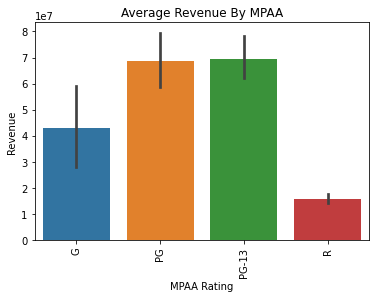

In [245]:
sns.barplot(data=df, x='certification', y= 'revenue')
plt.xticks(rotation = 90)
plt.title('Average Revenue By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Revenue');

Here we see that movies rated PG and PG-13 attain the highest amount of revenue and we have statistically backed that up with the ANOVA test.

### To answer the stackholders question we reject the null hypothesis as we see there is a significant difference in revenue based on a movies MPAA rating.

## Question 2
Does budget effect runtime?
Null Hypothesis:  Budget has no effect on a movies runtime.

Alternative Hypothesis: Budget has a significant effect on movies runtime.

Using an alpha=.05

Going to perform the ANOVA test